In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manoFunkcijos import *

In [3]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [8]:
sql="""select T3.Profesija, round(T3.vid/3.4528, 0) as vid2014, T4.vid as vid2018, round(((T4.vid)/(T3.vid/3.4528)-1)*100, 0) as proc
from (select Profesija, vid, profkod
from (-- 5 daugiausiai uzdirbancios profesijos 2014
select prof.Profesija, D2014.vid, D2014.profesija as profkod 
from
(select profesija, round(avg(bdu_spalio), 0) as vid from DUS2014N
group by profesija
order by vid desc
limit 5) as D2014
left join profesijos as prof
on D2014.profesija = prof.Kodas) as L1
union all
select Profesija, vid, profkod
from (-- 5 maziausiai uzdirbancios profesijos 2014 
select prof.Profesija, D2014.vid, D2014.profesija as profkod 
from
(select profesija, round(avg(bdu_spalio), 0) as vid from DUS2014N
group by profesija
order by vid asc
limit 5) as D2014
left join profesijos as prof
on D2014.profesija = prof.Kodas) as L2
union all
select Profesija, vid, profkod
from (-- 5 vidutiniskai uzdirbancios profesijos 2014
select prof.Profesija, round(vid,0) as vid, T1.profesija as profkod
from (select profesija, avg(bdu_spalio) as vid, T.vidurkis from DUS2014N
cross join (SELECT avg(bdu_spalio) as vidurkis FROM works.DUS2014N) as T
group by profesija
having vid <= 1.1*T.vidurkis
order by vid desc
limit 5) as T1
left join profesijos as prof
on prof.Kodas = T1.profesija
order by vid desc) as L3) as T3
left join (select profesija, round(avg(bdu_spalio),0) as vid from DUS2018N
group by profesija) as T4
on T4.profesija = T3.profkod
order by proc desc;"""
C.execute(sql)
ans = C.fetchall()
profesija, vid2014, vid, proc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 15
| 0 |Kirpėjai, kosmet|     263.0      |      484       |      84.0      |
| 1 |Laivų ir orlaivi|     1429.0     |      2268      |      59.0      |
| 2 |Kiti paslaugų as|     290.0      |      436       |      50.0      |
| 3 |Namų, viešbučių |     278.0      |      402       |      45.0      |
| 4 |Padavėjai ir bar|     312.0      |      447       |      43.0      |


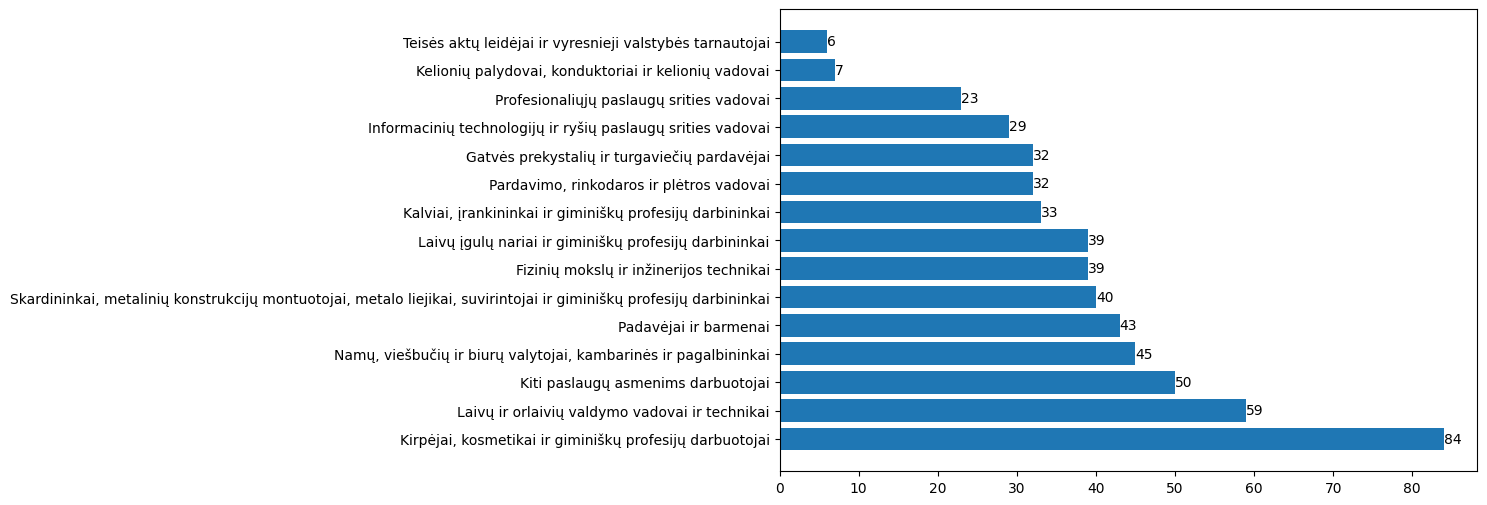

In [11]:
fig, axis = plt.subplots( figsize=(9, 6))

a=axis.barh(profesija, proc)
axis.bar_label(a)

plt.show()

In [12]:
sql="""select plotas, round(avg(kvm),0) as vidkvm from
(select 
ceil(cast(Plotas as float) / 5) * 5
as plotas,
cast(replace(replace(Kaina, ' ', ''), ' _','') as float) as kaina, cast(substring_index(`€/S`, '€', 1) as float) as kvm
from aruodas) as T1
group by plotas;"""
C.execute(sql)
ans = C.fetchall()
plotas, vidurkis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 50
| 0 |      10.0      |     2426.0     |
| 1 |      15.0      |     3404.0     |
| 2 |      20.0      |     2997.0     |
| 3 |      25.0      |     3181.0     |
| 4 |      30.0      |     3109.0     |


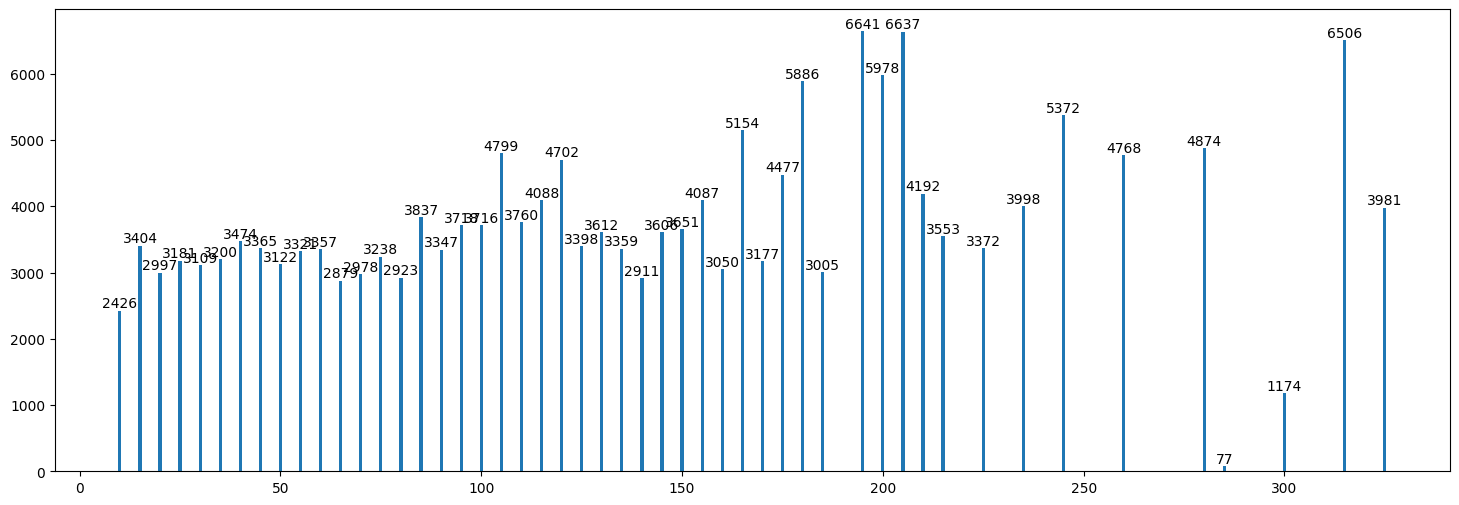

In [14]:
fig, axis = plt.subplots( figsize=(18, 6))

a=axis.bar(plotas, vidurkis)
axis.bar_label(a)

plt.show()

In [23]:
sql="""select Kambariai, round(avg(kvm),0) as vidkvm from
(select cast(Kambariai as float) as Kambariai,
cast(replace(replace(Kaina, ' ', ''), ' _','') as float) as kaina, cast(substring_index(`€/S`, '€', 1) as float) as kvm
from aruodas) as T1
group by Kambariai;"""
C.execute(sql)
ans = C.fetchall()
kambariai, vidurkis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 9
| 0 |      1.0       |     3074.0     |
| 1 |      2.0       |     3315.0     |
| 2 |      3.0       |     3288.0     |
| 3 |      4.0       |     3508.0     |
| 4 |      5.0       |     3590.0     |


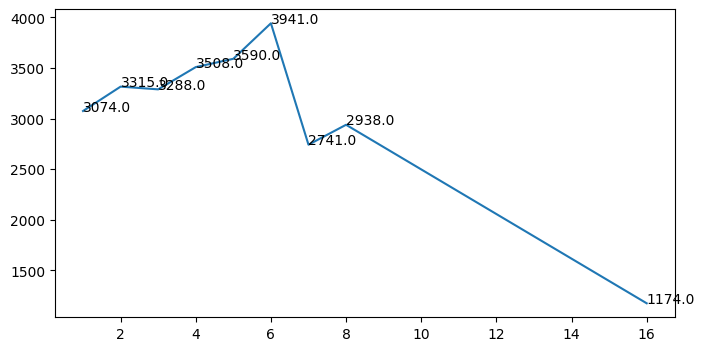

In [31]:
fig, axis = plt.subplots( figsize=(8,4))

axis.plot(kambariai, vidurkis)

for i in range(0, len(kambariai)):
    axis.text(kambariai[i], vidurkis[i], vidurkis[i])

plt.show()

In [32]:
sql="""select schema1, count(*) as kiekis from EismIvyk2020
group by schema1
order by kiekis desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
ivykis, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |Kiti eismo įvyki|     10492      |
| 1 |Kiti susidūrimai|      4891      |
| 2 |Nuvažiavimai nuo|      2464      |
| 3 |Susidūrimai juda|      2248      |
| 4 |Susidūrimai suka|      880       |


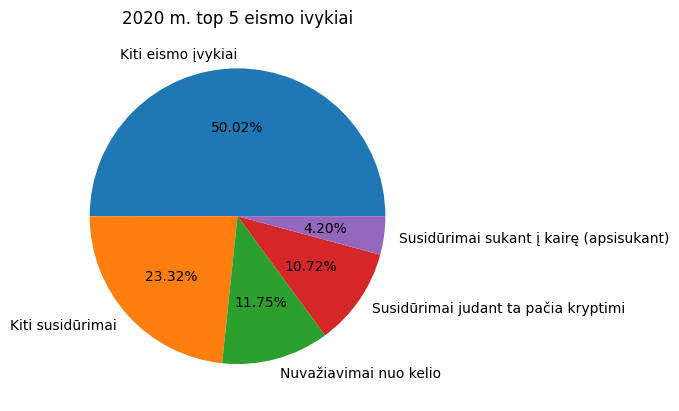

In [34]:
fig, axis = plt.subplots()

axis.pie(kiekis, labels = ivykis, autopct='%.2f%%')
axis.set_title('2020 m. top 5 eismo ivykiai')
plt.show()

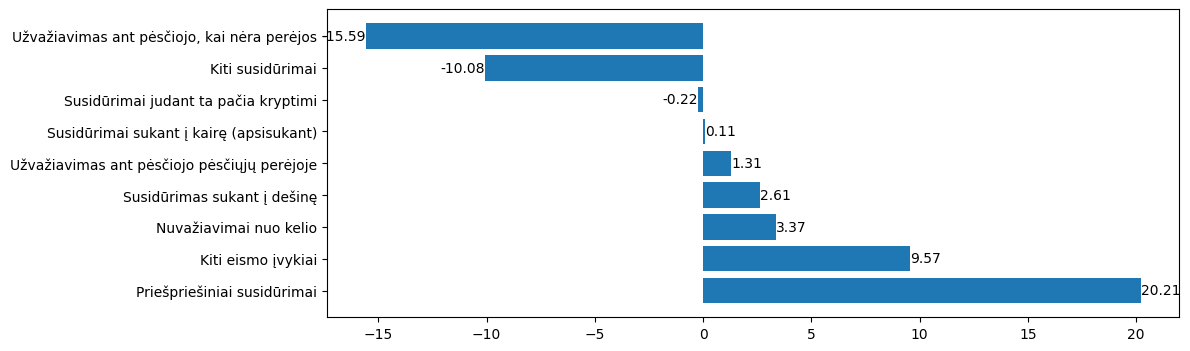

In [40]:
sql="""select schema1, kiekis2020, kiekis2021, round((kiekis2021/kiekis2020-1)*100,2) as proc from
(select schema1, count(*) as kiekis2020 from EismIvyk2020
group by schema1) as T1
left join
(select schema1, count(*) as kiekis2021 from EismIvyk2021
group by schema1) as T2
using (schema1)
order by proc desc;"""
C.execute(sql)
ans = C.fetchall()
ivykis, k1, k2, proc = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots( figsize=(11, 4))

a=axis.barh(ivykis, proc)
axis.bar_label(a)

plt.show()